### (a) For these three networks plot the degree distribution for each of the three networks that you downloaded. What are you able to conclude from these degree distributions?

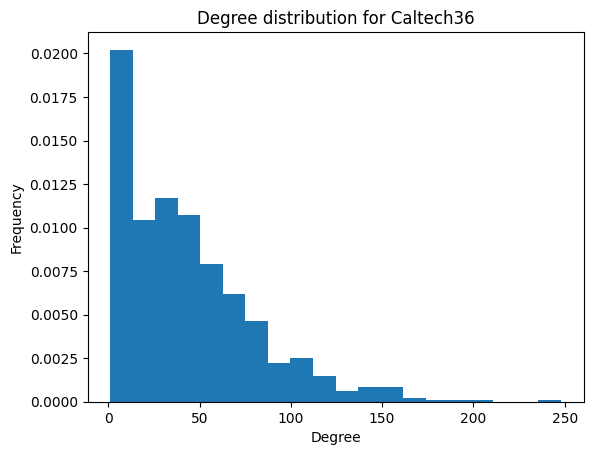

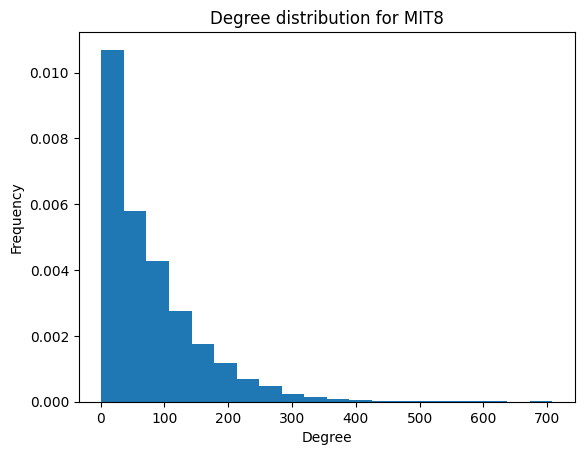

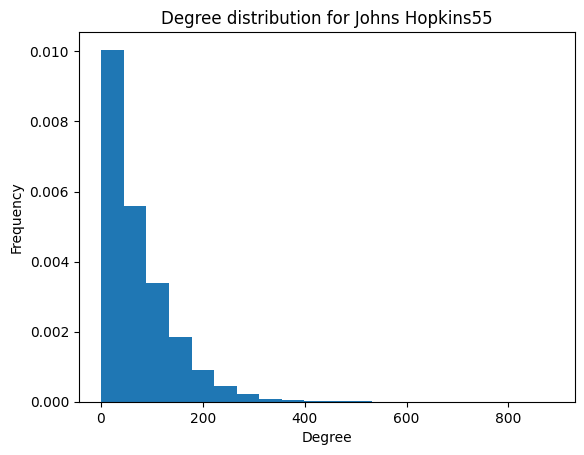

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

caltech_graph = nx.read_gml("./data/Caltech36.gml")
mit_graph = nx.read_gml("./data/MIT8.gml")
hopkins_graph = nx.read_gml("./data/Johns Hopkins55.gml")

# For these three networks plot the degree distribution for each of the three networks that you downloaded.

caltech_degree_sequence = sorted([d for n, d in caltech_graph.degree()], reverse=True)
mit_degree_sequence = sorted([d for n, d in mit_graph.degree()], reverse=True)
hopkins_degree_sequence = sorted([d for n, d in hopkins_graph.degree()], reverse=True)

# Histogram of degree distribution for Caltech36
plt.hist(caltech_degree_sequence, bins=20, density=True)
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree distribution for Caltech36")
plt.show()

# Histogram of degree distribution for MIT8
plt.hist(mit_degree_sequence, bins=20, density=True)
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree distribution for MIT8")
plt.show()

# Histogram of degree distribution for Johns Hopkins55
plt.hist(hopkins_degree_sequence, bins=20, density=True)
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree distribution for Johns Hopkins55")
plt.show()



### (b) Compute the global clustering coefficient and mean local clustering coefficient for each of the 3 networks. In addition compute the edge density of each network. Should either of these networks be construed as sparse? Based on the density information and the clustering information what can you said about the graph topology?

In [5]:
# Compute the global clustering coefficient for each of the three networks
global_clustering_coefficient_caltech = nx.average_clustering(caltech_graph)
global_clustering_coefficient_mit = nx.average_clustering(mit_graph)
global_clustering_coefficient_hopkins = nx.average_clustering(hopkins_graph)
print("Global clustering coefficient for Caltech36: ", global_clustering_coefficient_caltech)
print("Global clustering coefficient for MIT8: ", global_clustering_coefficient_mit)
print("Global clustering coefficient for Johns Hopkins55: ", global_clustering_coefficient_hopkins)

# compute mean of local clustering coefficient for each node in the network
local_clustering_coefficient_caltech = nx.clustering(caltech_graph)
local_clustering_coefficient_mit = nx.clustering(mit_graph)
local_clustering_coefficient_hopkins = nx.clustering(hopkins_graph)

mean_local_clustering_coefficient_caltech = np.mean(list(local_clustering_coefficient_caltech.values()))
mean_local_clustering_coefficient_mit = np.mean(list(local_clustering_coefficient_mit.values()))
mean_local_clustering_coefficient_hopkins = np.mean(list(local_clustering_coefficient_hopkins.values()))

print("Mean local clustering coefficient for Caltech36: ", mean_local_clustering_coefficient_caltech)
print("Mean local clustering coefficient for MIT8: ", mean_local_clustering_coefficient_mit)
print("Mean local clustering coefficient for Johns Hopkins55: ", mean_local_clustering_coefficient_hopkins)



Global clustering coefficient for Caltech36:  0.40929439048517247
Global clustering coefficient for MIT8:  0.2712187419501315
Global clustering coefficient for Johns Hopkins55:  0.26839307371293525
Mean local clustering coefficient for Caltech36:  0.4092943904851723
Mean local clustering coefficient for MIT8:  0.271218741950132
Mean local clustering coefficient for Johns Hopkins55:  0.2683930737129351


In [6]:
# Compute the edge density of each network
edge_density_caltech = nx.density(caltech_graph)
edge_density_mit = nx.density(mit_graph)
edge_density_hopkins = nx.density(hopkins_graph)
print("Edge density for Caltech36: ", edge_density_caltech)
print("Edge density for MIT8: ", edge_density_mit)
print("Edge density for Johns Hopkins55: ", edge_density_hopkins)


Edge density for Caltech36:  0.05640442132639792
Edge density for MIT8:  0.012118119495041378
Edge density for Johns Hopkins55:  0.013910200162372396
